# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Wholesale_customers_data.csv')

# Display the first few rows of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


In [10]:
print(df.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


**COMPLETE THE REQUIRED TASKS:**


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

**TASK: Create a PairPlot of the dataframe, colored by Region.**

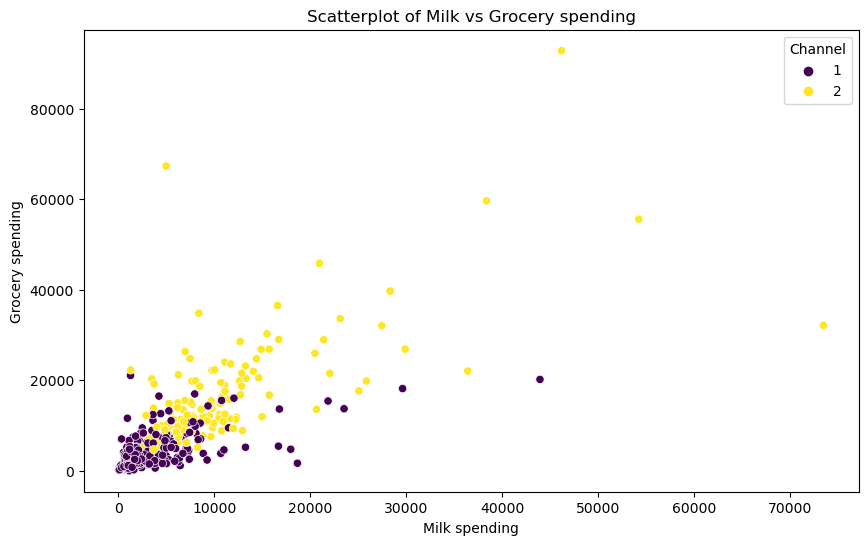

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


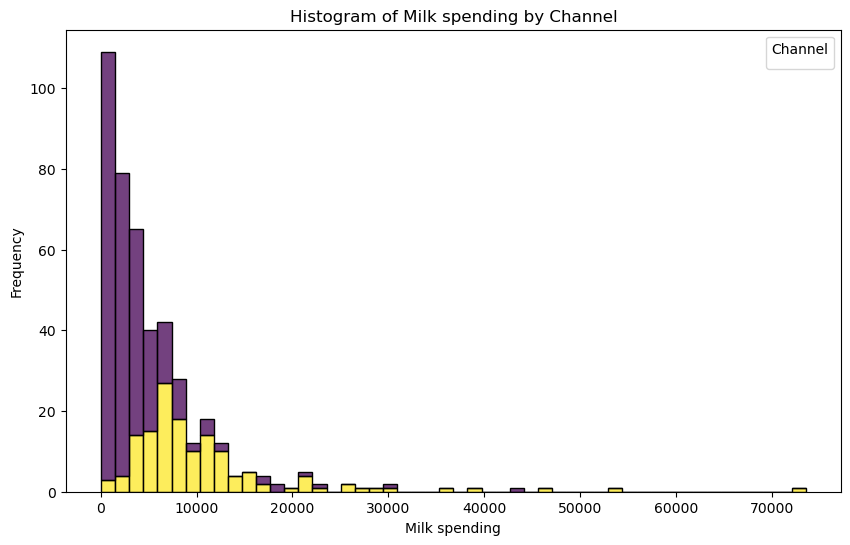

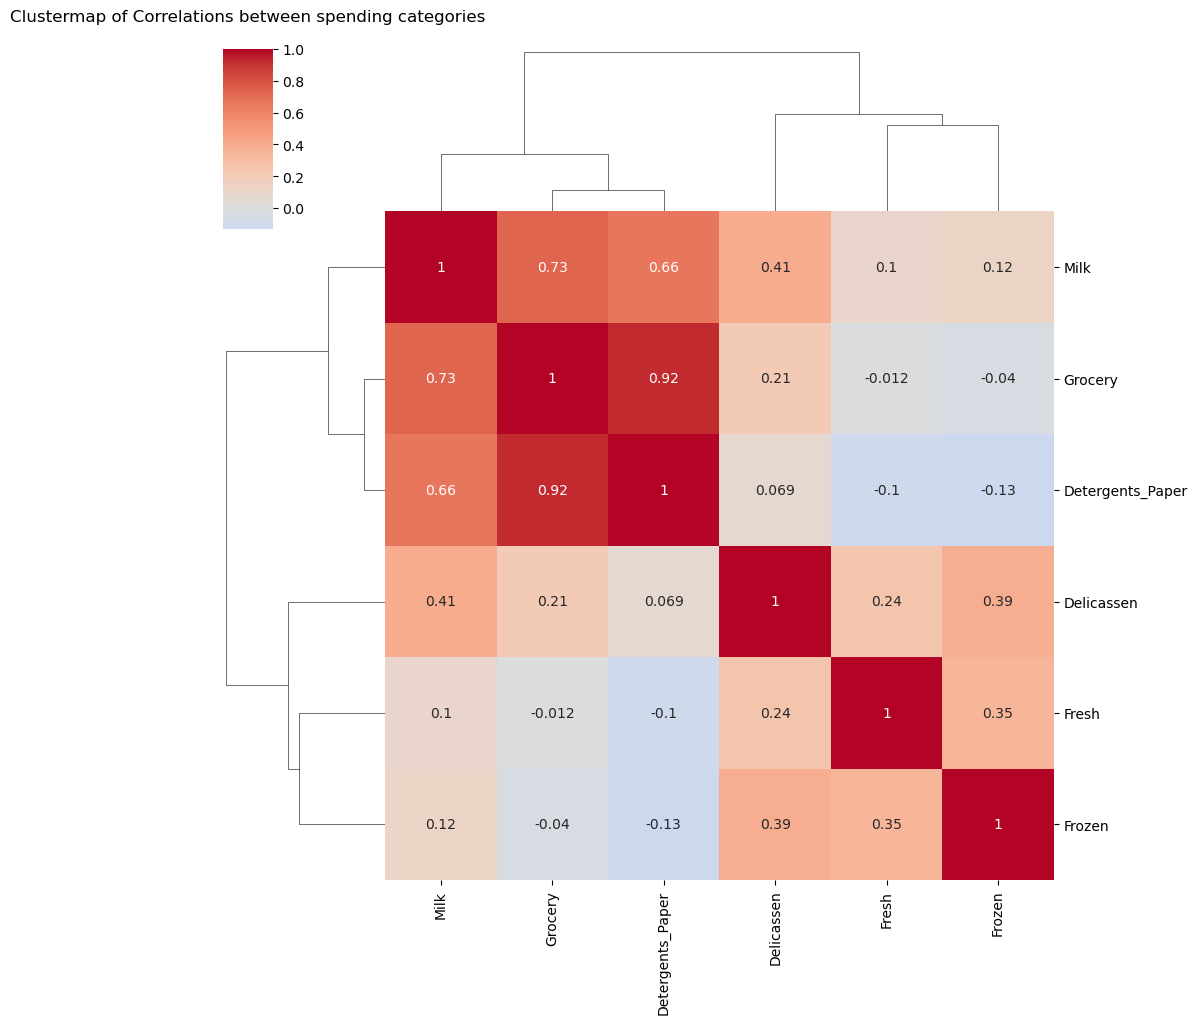

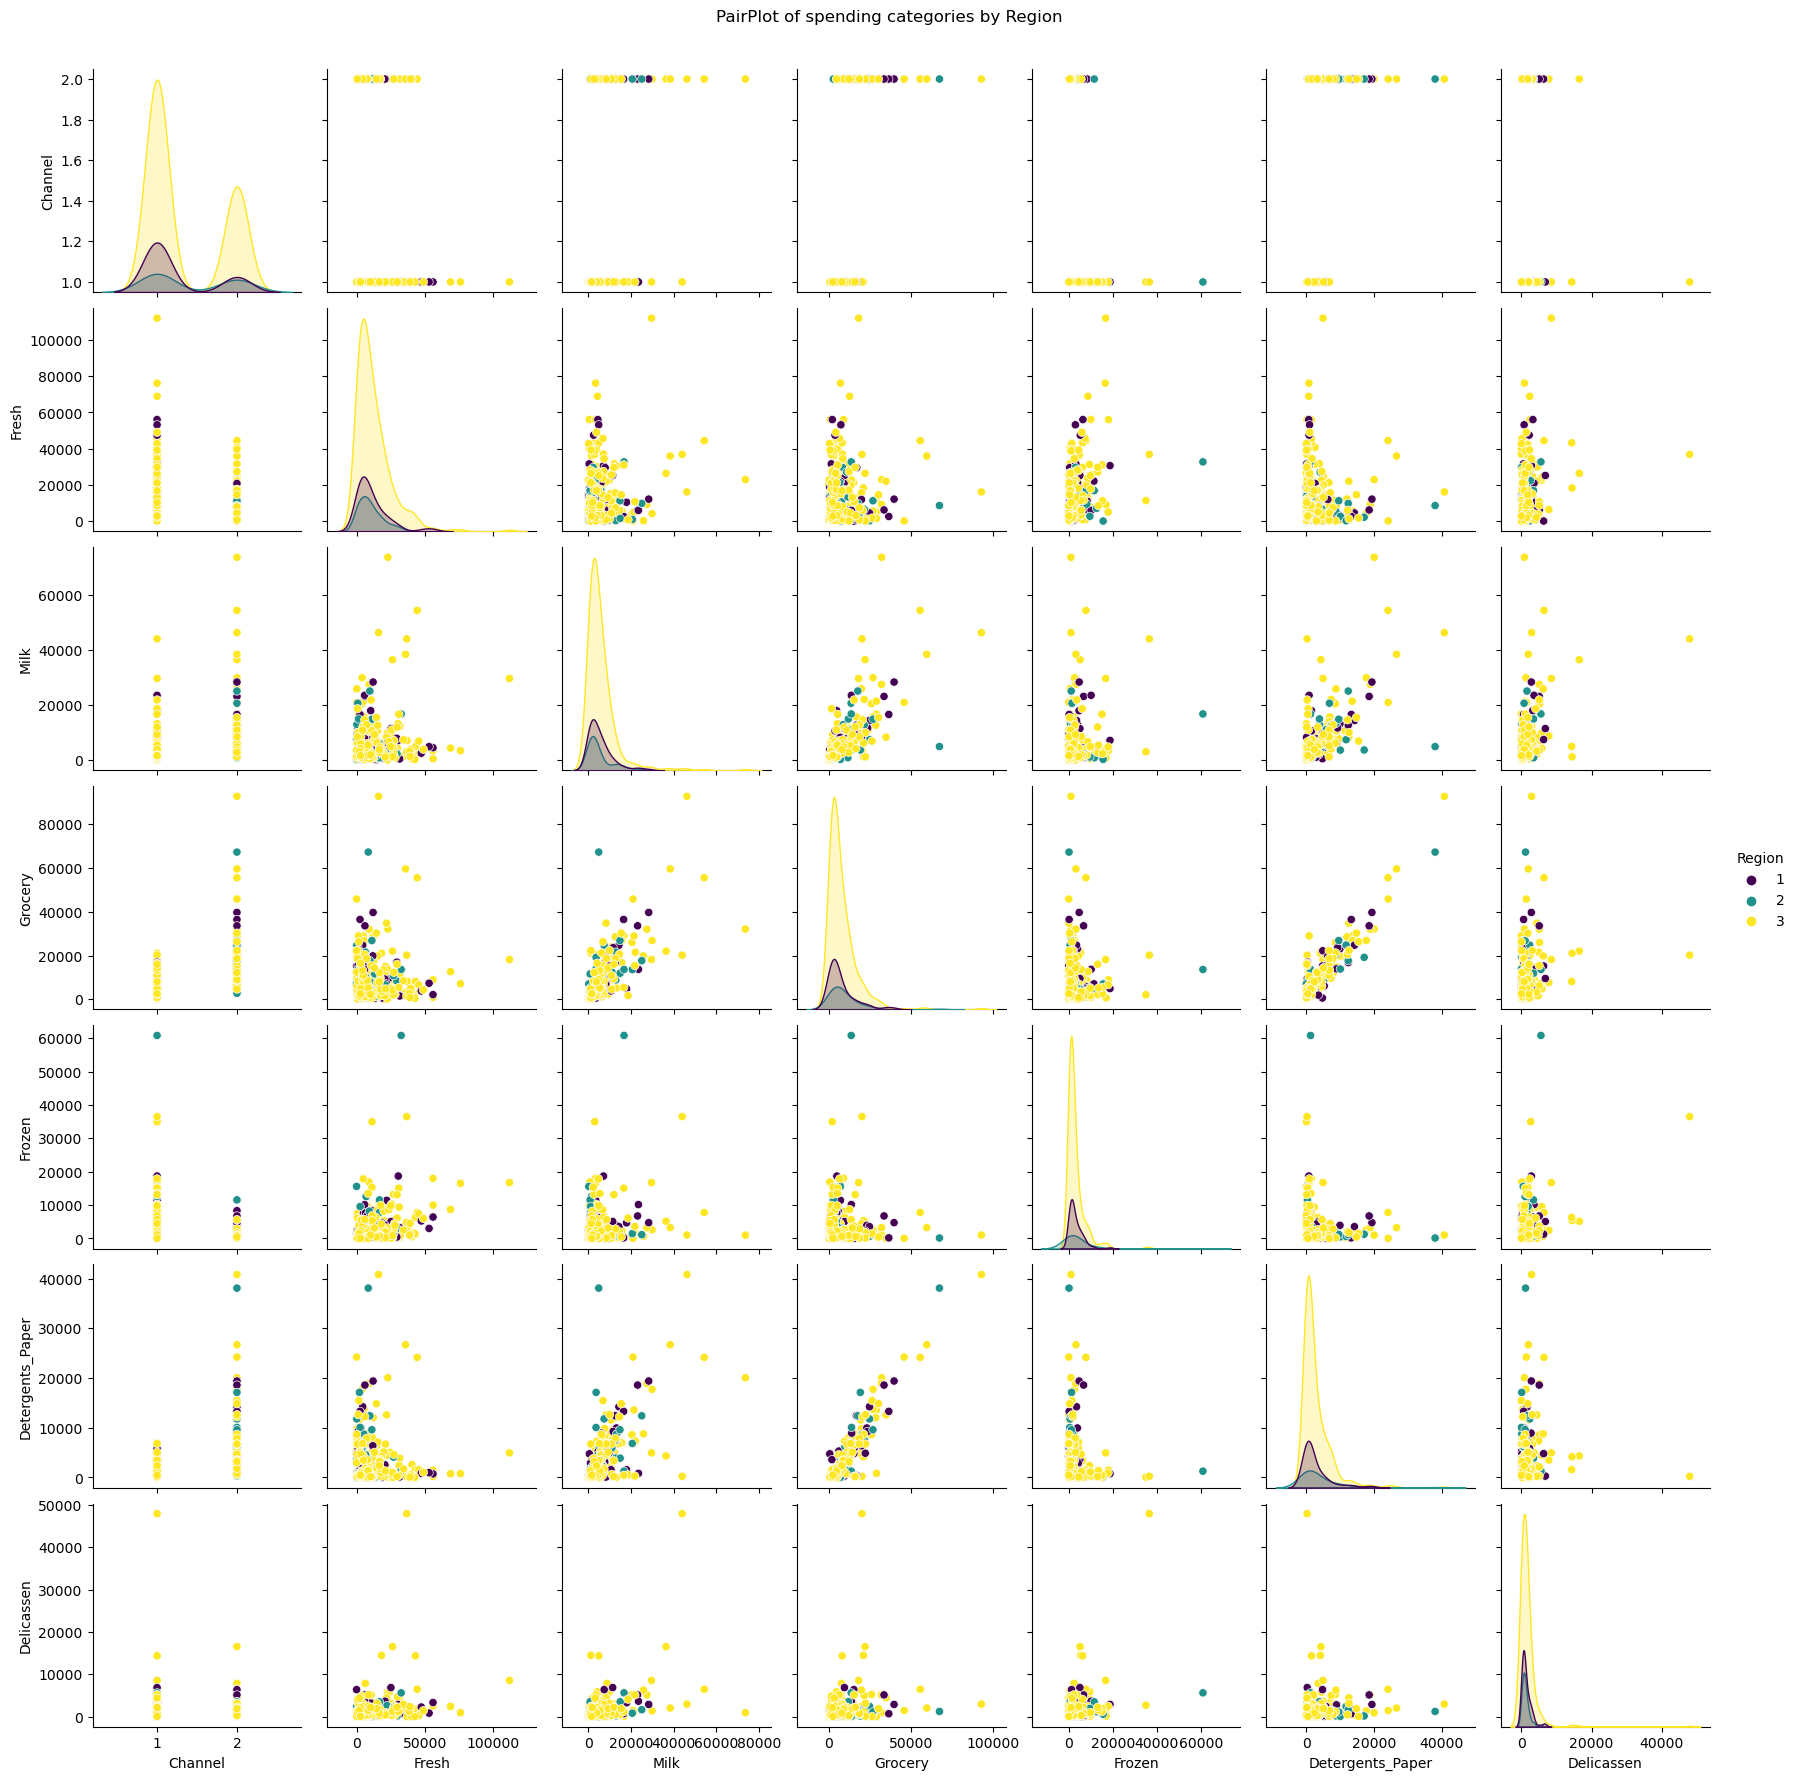

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Wholesale_customers_data.csv')

# Task 1: Scatterplot of Milk vs Grocery spending, colored by Channel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='viridis')
plt.title('Scatterplot of Milk vs Grocery spending')
plt.xlabel('Milk spending')
plt.ylabel('Grocery spending')
plt.legend(title='Channel')
plt.show()

# Task 2: Histogram of Milk spending, colored by Channel
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack', palette='viridis')
plt.title('Histogram of Milk spending by Channel')
plt.xlabel('Milk spending')
plt.ylabel('Frequency')
plt.legend(title='Channel')
plt.show()

# Task 3: Annotated Clustermap of Correlations between spending categories
corr = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].corr()
sns.clustermap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Clustermap of Correlations between spending categories', pad=20)
plt.show()

# Task 4: PairPlot of the dataframe, colored by Region
sns.pairplot(df, hue='Region', palette='viridis')
plt.suptitle('PairPlot of spending categories by Region', y=1.02)
plt.show()

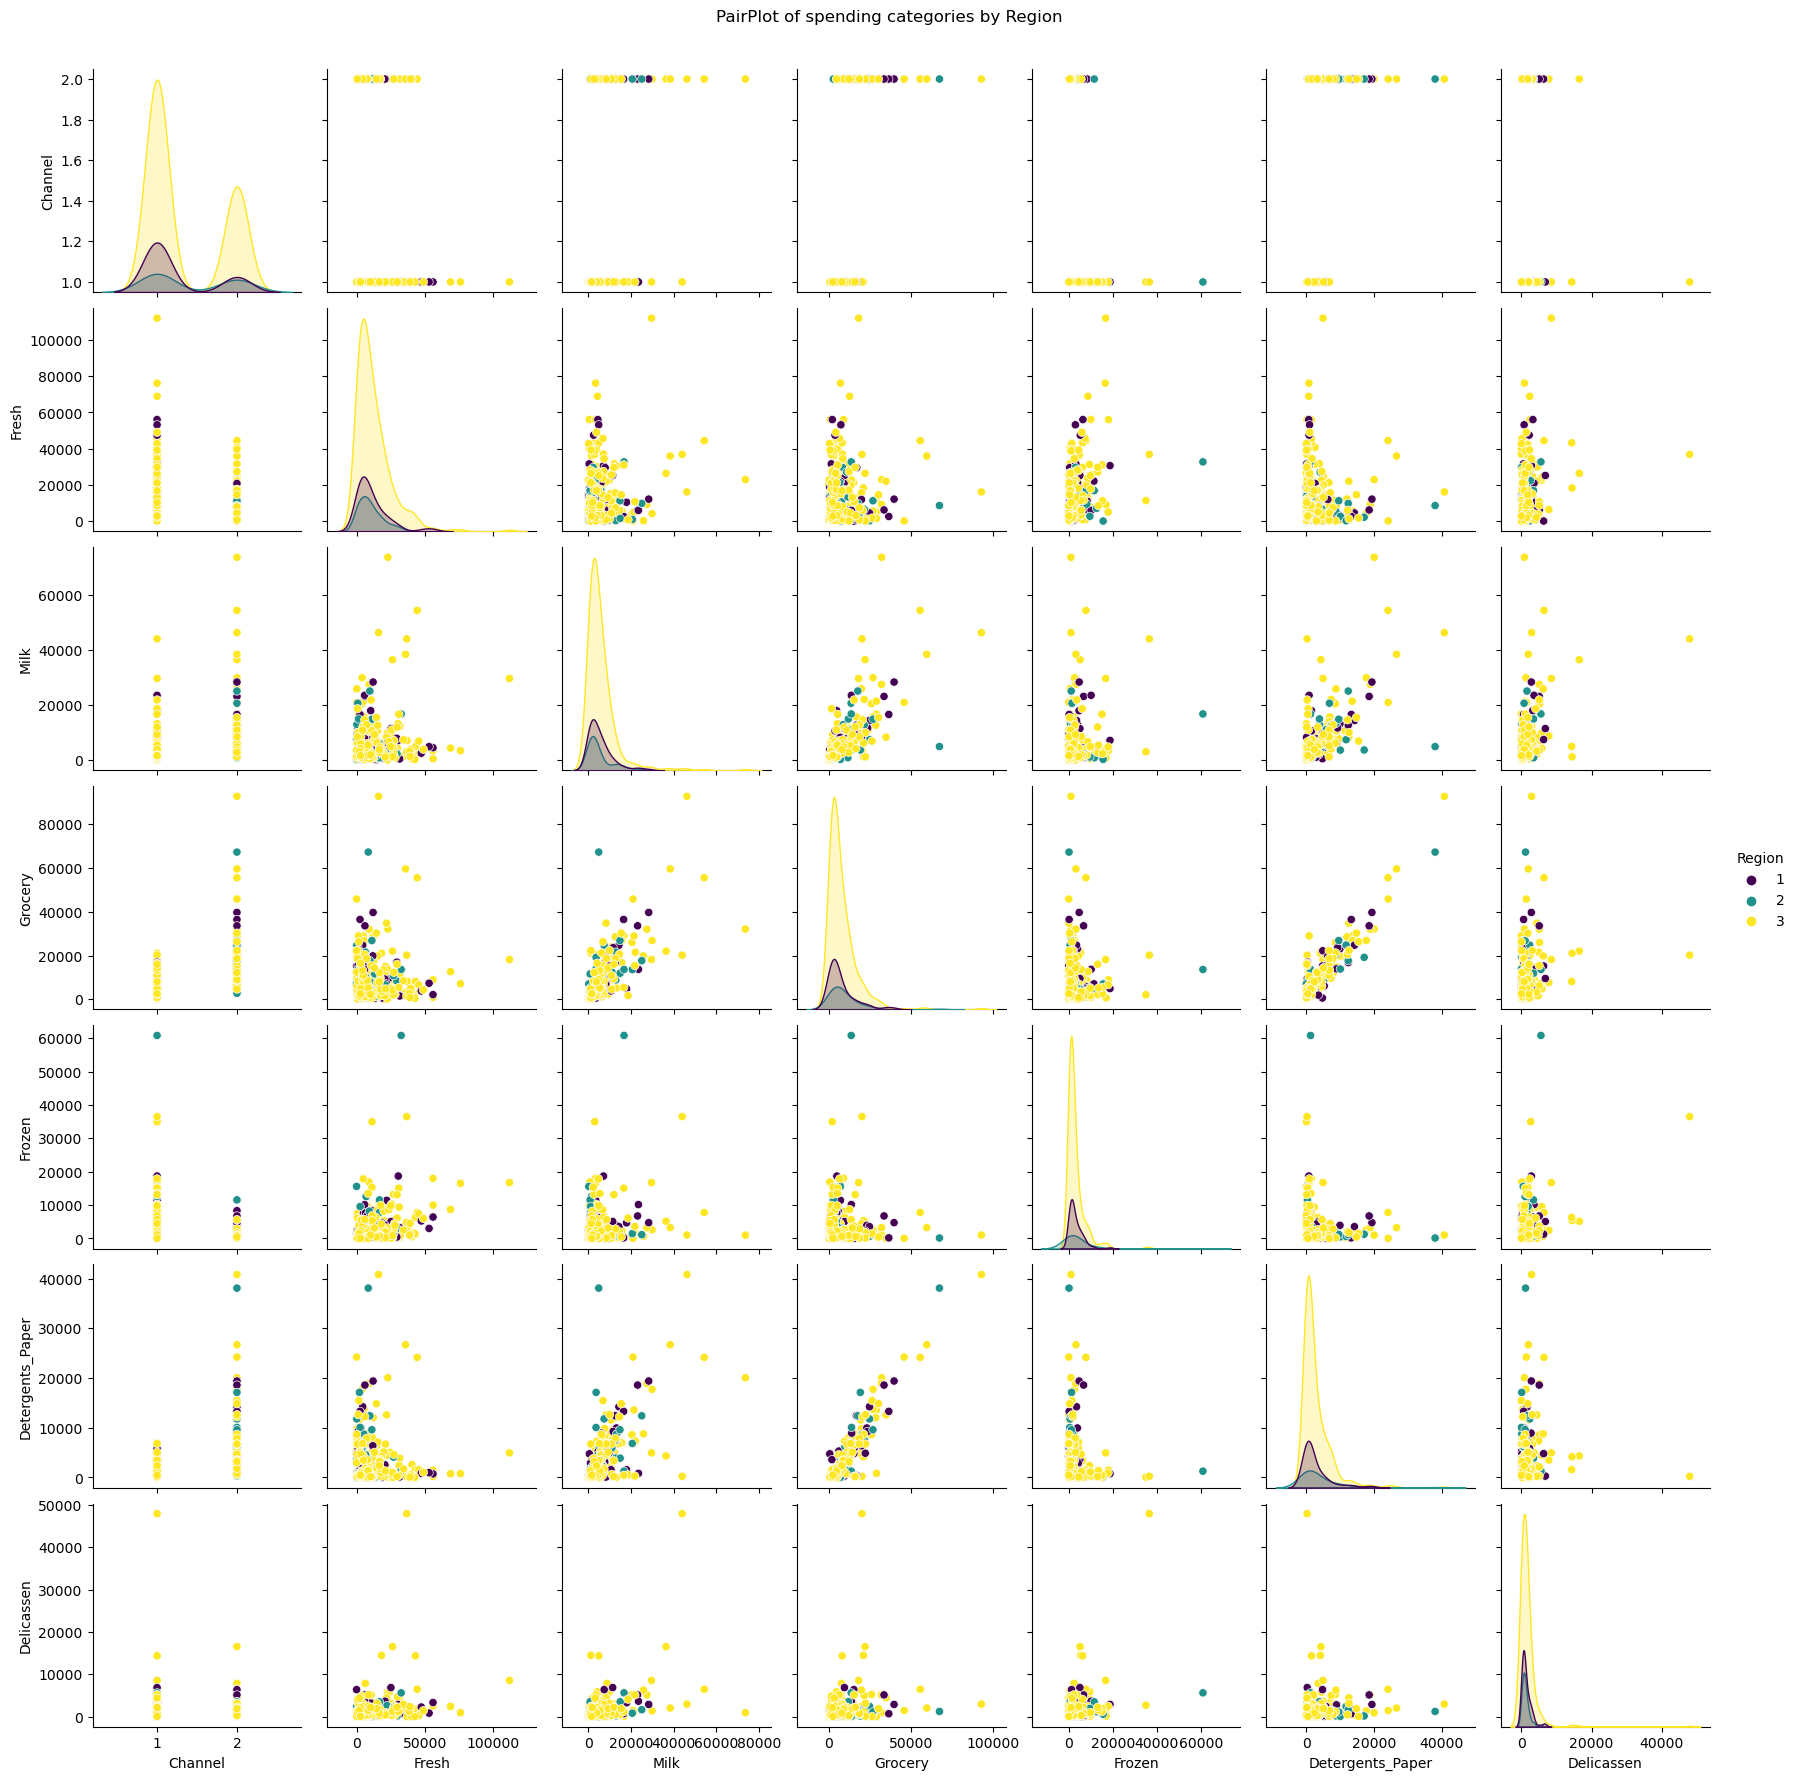

In [15]:
# PairPlot
sns.pairplot(df, hue='Region', palette='viridis')
plt.suptitle('PairPlot of spending categories by Region', y=1.02)
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


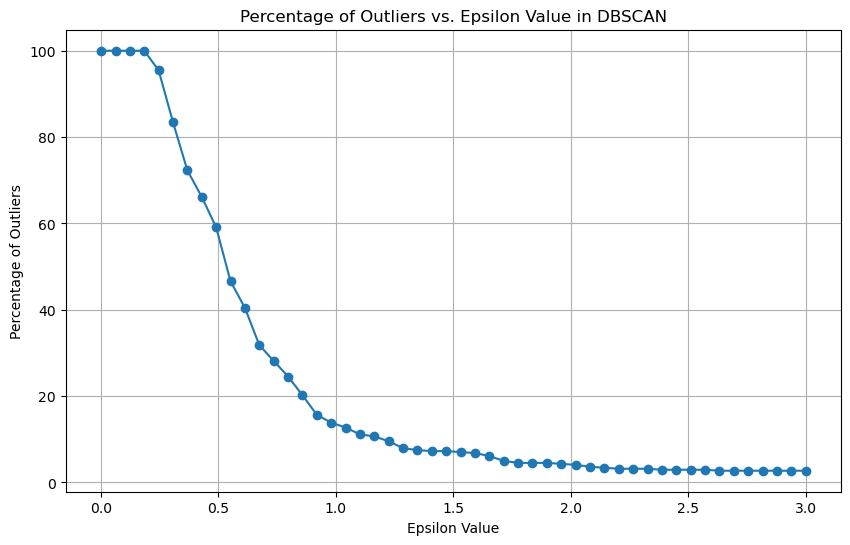

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Wholesale_customers_data.csv')

# Display the first few rows of the dataset
print(data.head())

# Drop the 'Channel' and 'Region' columns since we are focusing on numerical features
features = data.drop(['Channel', 'Region'], axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Set the range of epsilon values to test
epsilon_values = np.linspace(0.001, 3, 50)
min_samples = 2 * scaled_features.shape[1]

outlier_percentages = []

# Loop over the epsilon values
for epsilon in epsilon_values:
    # Create and fit the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    dbscan.fit(scaled_features)
    
    # Identify the core points, border points, and outliers
    labels = dbscan.labels_
    
    # Calculate the percentage of outliers (where labels == -1)
    num_outliers = np.sum(labels == -1)
    outlier_percentage = num_outliers / len(labels) * 100
    outlier_percentages.append(outlier_percentage)

# Plot the percentage of outliers vs. epsilon values
plt.figure(figsize=(10, 6))
plt.plot(epsilon_values, outlier_percentages, marker='o', linestyle='-')
plt.xlabel('Epsilon Value')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers vs. Epsilon Value in DBSCAN')
plt.grid(True)
plt.show()

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

**TASK: What spending category were the two clusters mode different in?**

In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Wholesale_customers_data.csv')

# Display the first few rows to understand the data
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the relevant features for clustering
features = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train the DBSCAN model
dbscan = DBSCAN(eps=2, min_samples=5)
labels = dbscan.fit_predict(features_scaled)

# Add the labels to the original dataframe
df['Labels'] = labels

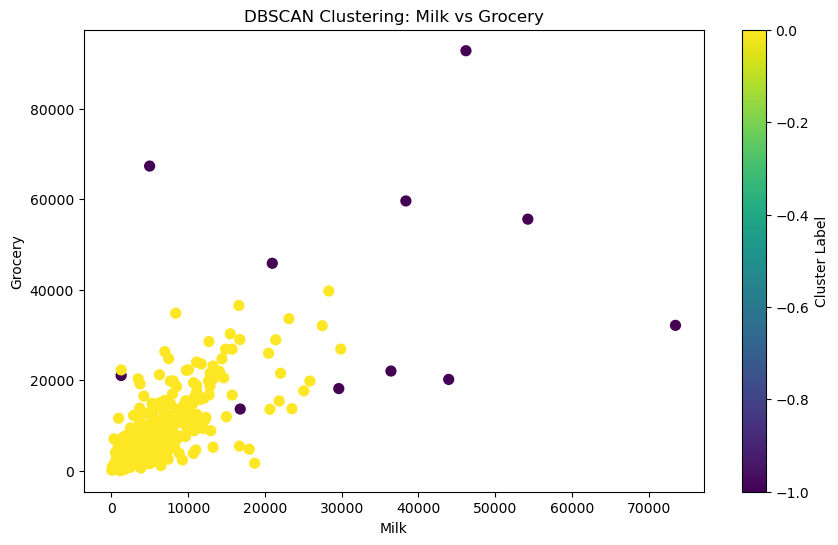

In [19]:
import matplotlib.pyplot as plt

# Scatterplot of Milk vs Grocery
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=df['Labels'], cmap='viridis', s=50)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('DBSCAN Clustering: Milk vs Grocery')
plt.colorbar(label='Cluster Label')
plt.show()

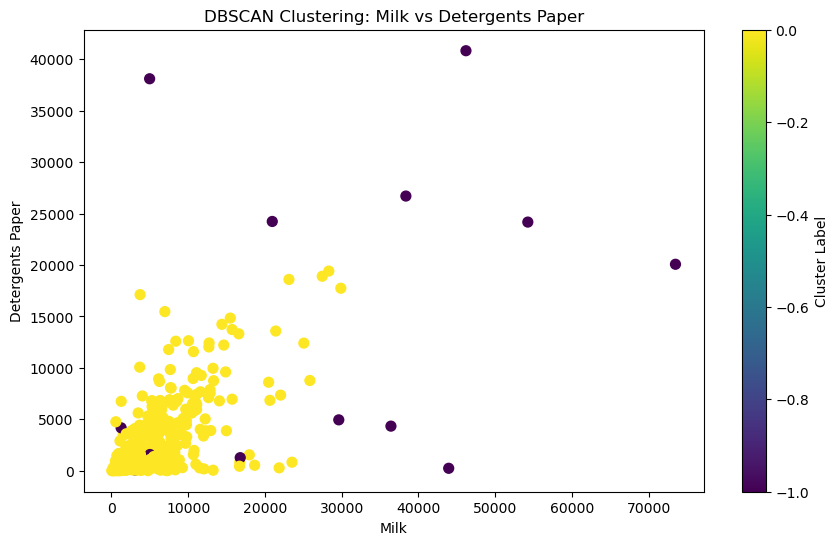

In [20]:
# Scatterplot of Milk vs Detergents Paper
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Detergents_Paper'], c=df['Labels'], cmap='viridis', s=50)
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.title('DBSCAN Clustering: Milk vs Detergents Paper')
plt.colorbar(label='Cluster Label')
plt.show()

In [21]:
# Calculate the mean for each cluster and outliers
cluster_means = df.groupby('Labels').mean()

# Display the means
cluster_means

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,,,
-1,1.538462,2.846154,31466.000000,28802.076923,35259.461538,13785.538462,14670.846154,9624.076923
0,1.316159,2.533958,11407.665105,5095.854801,7119.880562,2745.756440,2522.566745,1278.290398


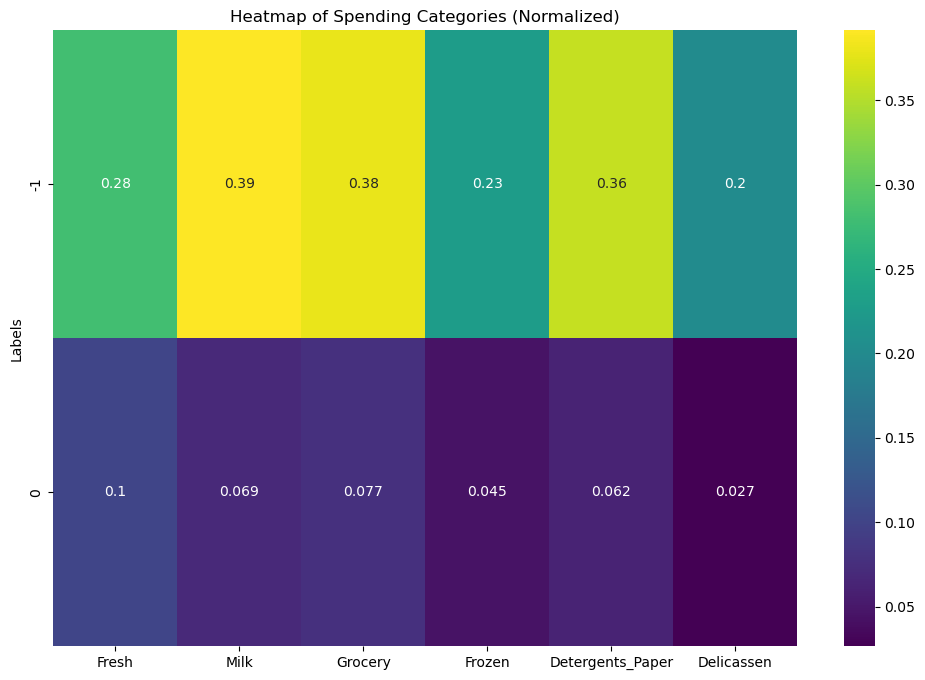

In [22]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Normalize the features
min_max_scaler = MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]), columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

# Add the labels to the normalized dataframe
df_normalized['Labels'] = df['Labels']

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized.groupby('Labels').mean(), annot=True, cmap='viridis')
plt.title('Heatmap of Spending Categories (Normalized)')
plt.show()

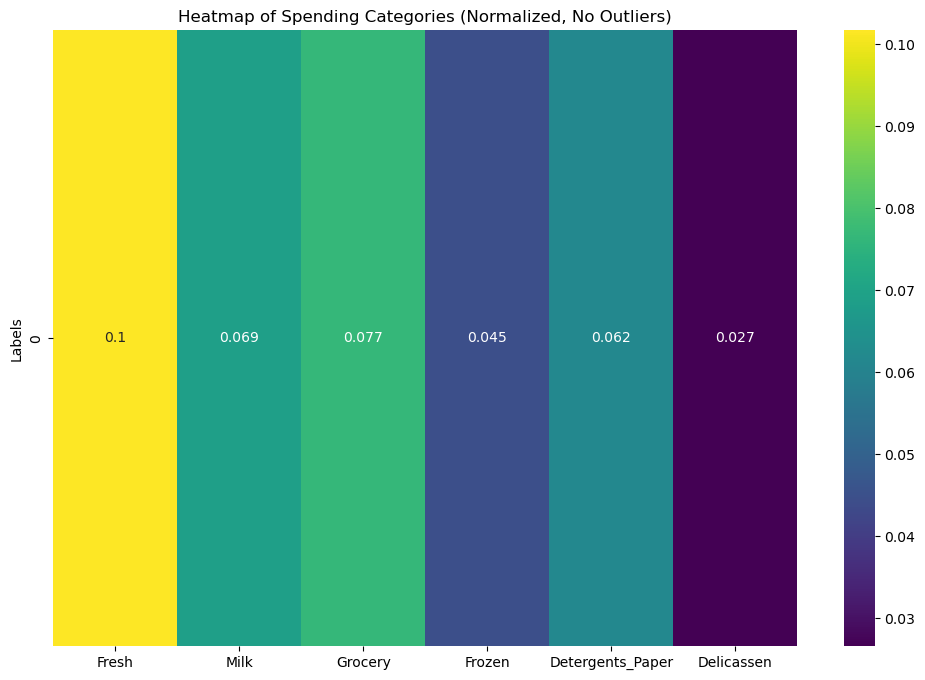

In [23]:
# Filter out the outliers (label = -1)
df_normalized_no_outliers = df_normalized[df_normalized['Labels'] != -1]

# Create a heatmap without outliers
plt.figure(figsize=(12, 8))
sns.heatmap(df_normalized_no_outliers.groupby('Labels').mean(), annot=True, cmap='viridis')
plt.title('Heatmap of Spending Categories (Normalized, No Outliers)')
plt.show()

In [24]:
# Calculate the difference in means between clusters
cluster_means_no_outliers = df_normalized_no_outliers.groupby('Labels').mean()
mean_differences = cluster_means_no_outliers.max() - cluster_means_no_outliers.min()

# Determine the category with the maximum difference
most_different_category = mean_differences.idxmax()

most_different_category

'Fresh'

The two clusters mode were different in the "Fresh" category.